In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

In [28]:
data = pd.read_csv('VGChartz-raw.csv',index_col = 0)
data.head()

,Unnamed: 0,Pos,Game,Console,Publisher,Critic Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update
0,0,1,Pokemon,Series,Nintendo,N/A,362.06m,NaN,NaN,NaN,NaN,NaN,28th Sep 98,03rd Feb 20
1,1,2,Super Mario,Series,Nintendo,N/A,354.51m,NaN,NaN,NaN,NaN,NaN,20th Jul 83,20th Feb 20
2,2,3,Call of Duty,Series,Activision,N/A,300.00m,NaN,NaN,NaN,NaN,NaN,29th Oct 03,03rd Feb 20
3,3,4,Grand Theft Auto,Series,ASC Games,N/A,300.00m,NaN,NaN,NaN,NaN,NaN,27th Mar 98,03rd Feb 20
4,4,5,FIFA,Series,EA Sports,N/A,282.40m,NaN,NaN,NaN,NaN,NaN,15th Dec 93,03rd Feb 20


In [29]:
# data.drop(data.columns[0],axis = 1, inplace = True)

In [30]:
data = data.replace('NaN', np.nan)

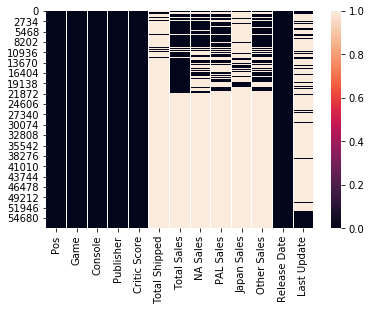

In [5]:
sns.heatmap(data.isna())

In [148]:
df = data[data['Total Shipped'].notnull()]

In [149]:
#get data
df2 = data[data['Total Sales'].notnull()]

In [13]:
# df2.to_csv('vg_total_sales.csv')

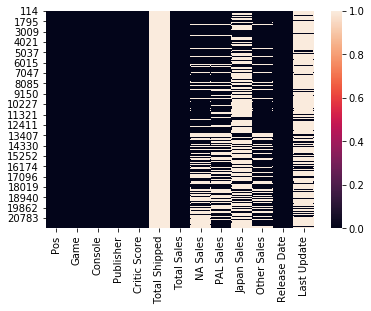

In [14]:
sns.heatmap(df2.isna())

In [201]:
df2

,Pos,Game,Console,Publisher,Critic Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,Release Year
114,115,Grand Theft Auto V,PS3,Rockstar Games,N/A,NaN,20.32m,6.37m,9.85m,0.99m,3.12m,17th Sep 13,NaN,13
128,129,Grand Theft Auto V,PS4,Rockstar Games,N/A,NaN,19.39m,6.06m,9.71m,0.60m,3.02m,18th Nov 14,03rd Jan 18,14
156,157,Grand Theft Auto: Vice City,PS2,Rockstar Games,N/A,NaN,16.15m,8.41m,5.49m,0.47m,1.78m,28th Oct 02,NaN,02
159,160,Grand Theft Auto V,X360,Rockstar Games,N/A,NaN,15.86m,9.06m,5.33m,0.06m,1.42m,17th Sep 13,NaN,13
162,163,Call of Duty: Black Ops 3,PS4,Activision,N/A,NaN,15.09m,6.18m,6.05m,0.41m,2.44m,06th Nov 15,14th Jan 18,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21680,21681,"Mind, Body & Soul: Blend It!",DS,505 Games,N/A,NaN,0.00m,NaN,0.00m,NaN,NaN,23rd Apr 10,NaN,10
21681,21682,Ride! Carnival Tycoon,PC,ValuSoft,N/A,NaN,0.00m,NaN,0.00m,NaN,NaN,01st Aug 07,NaN,07
21682,21683,Shinobido: Tales of the Ninja,PSP,Sony Computer Entertainment,N/A,NaN,0.00m,NaN,0.00m,NaN,NaN,09th Feb 07,NaN,07
21683,21684,Tactical Ops: Assault on Terror,PC,Atari,N/A,NaN,0.00m,NaN,0.00m,NaN,NaN,24th Apr 02,NaN,02


In [151]:
df2['Release Year'] = df2['Release Date'].apply(lambda x: x.strip()[-2:])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


True

In [173]:
df2['Release Year'].unique()

array(['13', '14', '02', '15', '11', '10', '18', '12', '09', '17', '01',
       '08', '16', '07', '05', '97', '03', '98', '04', '99', '96', '06',
       '00', '82', '81', '89', '94', '95', '93', '90', '78', '88', '/A',
       '83', '86', '92', '77', '87', '91', '85', '19', '20', '84', '80',
       '70', '79'], dtype=object)

In [180]:
df2[((df2['Release Year'] < '80') & (df2['Release Year'] > '08'))].drop(columns = ['Pos','Critic Score']).to_csv('vg_sales_08_18.csv')

In [197]:
fiveyear = pd.read_csv('vg_saleS_08_18.csv')